Epoch [1/12], Step [100/600], Loss: 1.2370
Epoch [1/12], Step [200/600], Loss: 1.2661
Epoch [1/12], Step [300/600], Loss: 1.2587
Epoch [1/12], Step [400/600], Loss: 1.0687
Epoch [1/12], Step [500/600], Loss: 1.1786
Epoch [1/12], Step [600/600], Loss: 1.1372
Epoch [2/12], Step [100/600], Loss: 1.0999
Epoch [2/12], Step [200/600], Loss: 1.2869
Epoch [2/12], Step [300/600], Loss: 1.1595
Epoch [2/12], Step [400/600], Loss: 1.0058
Epoch [2/12], Step [500/600], Loss: 0.9648
Epoch [2/12], Step [600/600], Loss: 0.9111
Epoch [3/12], Step [100/600], Loss: 1.2636
Epoch [3/12], Step [200/600], Loss: 0.9402
Epoch [3/12], Step [300/600], Loss: 0.9789
Epoch [3/12], Step [400/600], Loss: 0.9325
Epoch [3/12], Step [500/600], Loss: 1.0826
Epoch [3/12], Step [600/600], Loss: 0.9886
Epoch [4/12], Step [100/600], Loss: 1.0917
Epoch [4/12], Step [200/600], Loss: 0.9020
Epoch [4/12], Step [300/600], Loss: 0.8595
Epoch [4/12], Step [400/600], Loss: 0.9955
Epoch [4/12], Step [500/600], Loss: 0.9979
Epoch [4/12

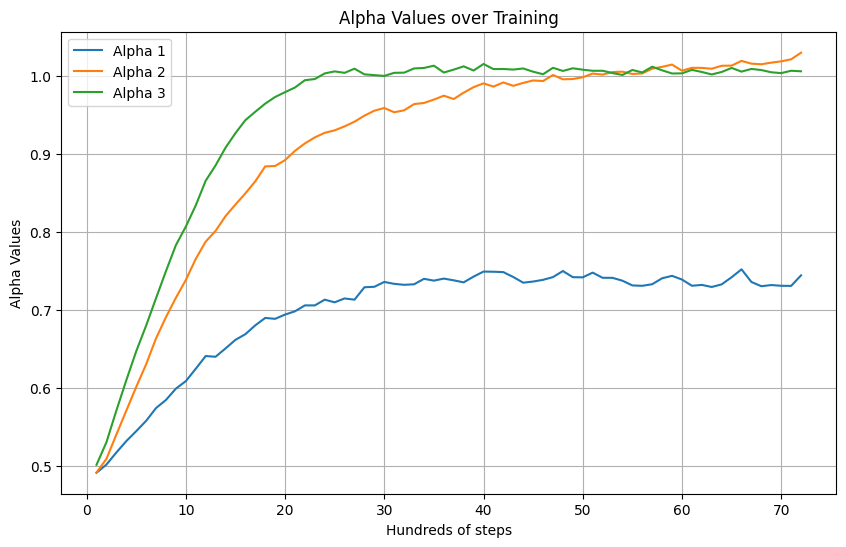

Model Accuracy on the 10000 test images: 90.99 %
alpha1 =  0.7444028854370117 alpha2 =  1.0294873714447021 alpha3 =  1.0057133436203003


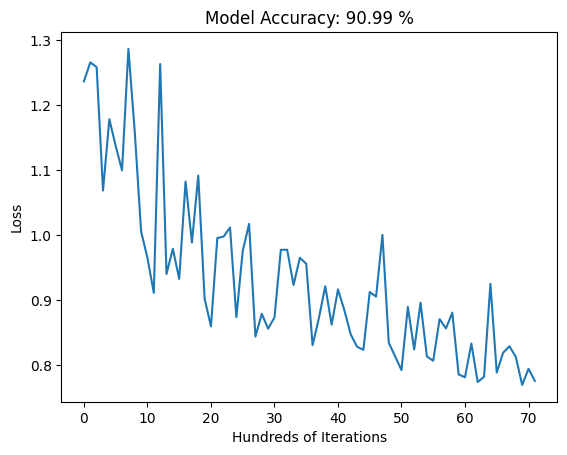

Predicted Label for Image below is Ankle Boot


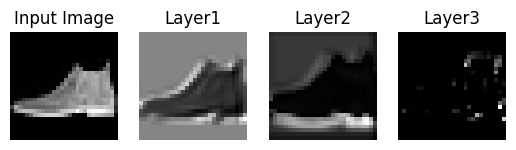

Predicted Label for Image below is Pullover


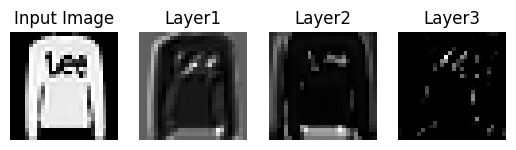

Predicted Label for Image below is Trouser


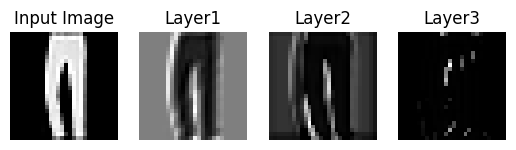

Predicted Label for Image below is Trouser


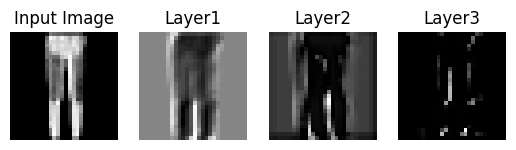

Predicted Label for Image below is Shirt


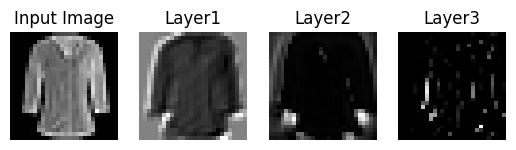

Predicted Label for Image below is Trouser


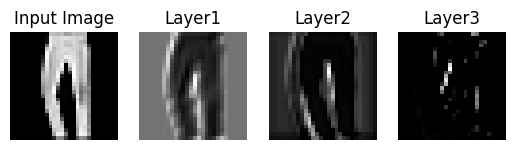

Predicted Label for Image below is Coat


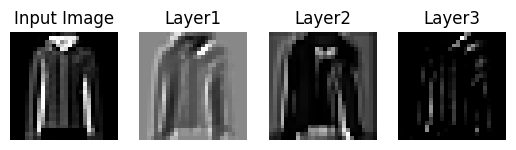

Predicted Label for Image below is Shirt


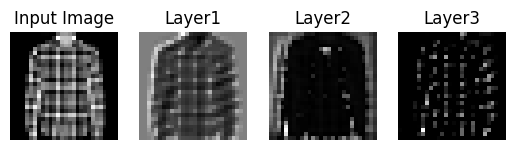

Predicted Label for Image below is Sandal


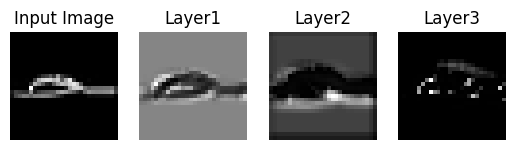

Predicted Label for Image below is Sneaker


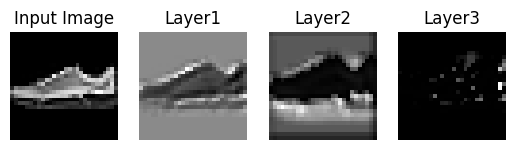

Epoch [1/12], Step [100/600], Loss: 1.5518
Epoch [1/12], Step [200/600], Loss: 1.6911
Epoch [1/12], Step [300/600], Loss: 1.3696
Epoch [1/12], Step [400/600], Loss: 1.5527
Epoch [1/12], Step [500/600], Loss: 1.4768
Epoch [1/12], Step [600/600], Loss: 1.4305
Epoch [2/12], Step [100/600], Loss: 1.4125
Epoch [2/12], Step [200/600], Loss: 1.3861
Epoch [2/12], Step [300/600], Loss: 1.3544
Epoch [2/12], Step [400/600], Loss: 1.3966
Epoch [2/12], Step [500/600], Loss: 1.3256
Epoch [2/12], Step [600/600], Loss: 1.3930
Epoch [3/12], Step [100/600], Loss: 1.3010
Epoch [3/12], Step [200/600], Loss: 1.2349
Epoch [3/12], Step [300/600], Loss: 1.3243
Epoch [3/12], Step [400/600], Loss: 1.3993
Epoch [3/12], Step [500/600], Loss: 1.2945
Epoch [3/12], Step [600/600], Loss: 1.3332
Epoch [4/12], Step [100/600], Loss: 1.2801
Epoch [4/12], Step [200/600], Loss: 1.3514
Epoch [4/12], Step [300/600], Loss: 1.5058
Epoch [4/12], Step [400/600], Loss: 1.4386
Epoch [4/12], Step [500/600], Loss: 1.2825
Epoch [4/12

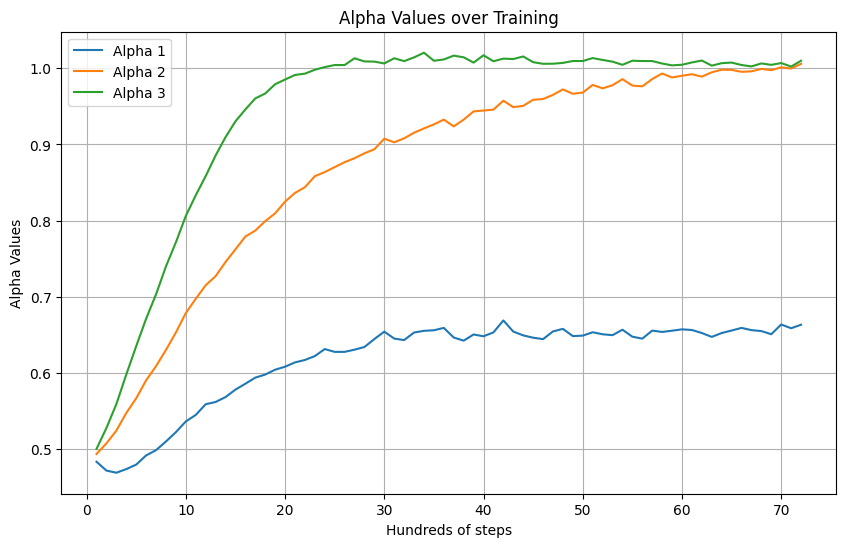

Model Accuracy on the 10000 test images: 91.12 %
alpha1 =  0.6630905866622925 alpha2 =  1.005902647972107 alpha3 =  1.0099523067474365


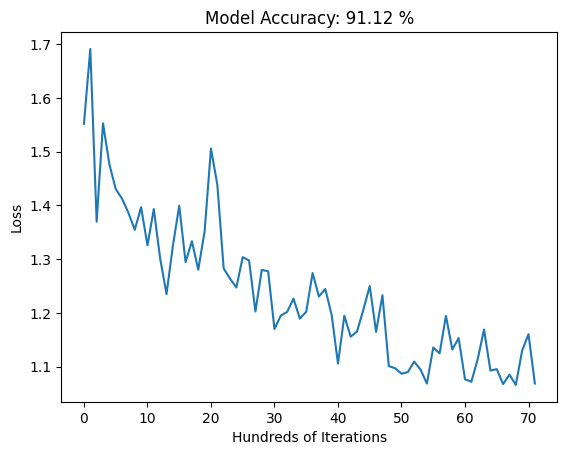

Predicted Label for Image below is Ankle Boot


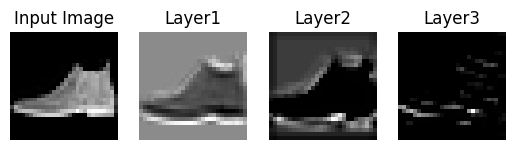

Predicted Label for Image below is Pullover


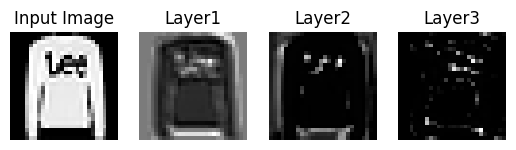

Predicted Label for Image below is Trouser


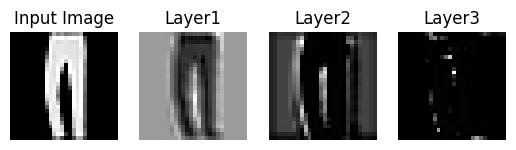

Predicted Label for Image below is Trouser


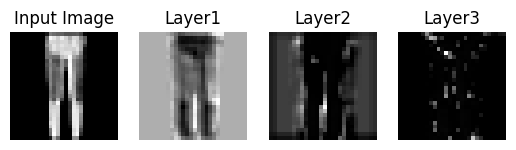

Predicted Label for Image below is Shirt


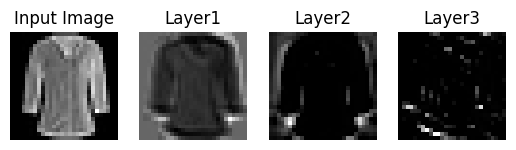

Predicted Label for Image below is Trouser


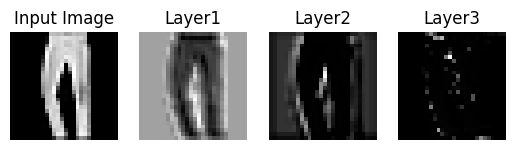

Predicted Label for Image below is Coat


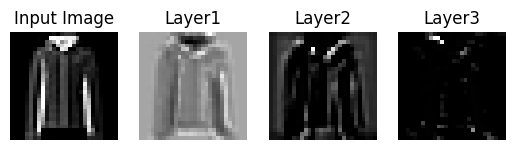

Predicted Label for Image below is Shirt


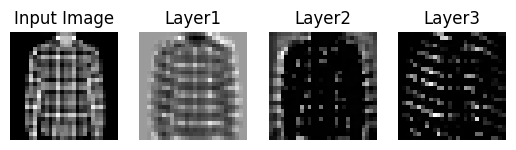

Predicted Label for Image below is Sandal


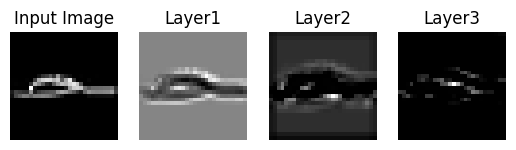

Predicted Label for Image below is Sneaker


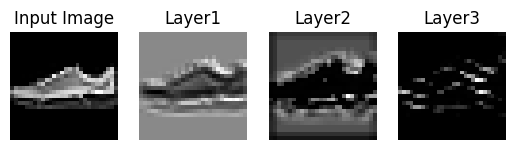

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim

# config device
device = torch.device('cpu')

for Lambda in [0.5, 0.7]:
    # hyper-parameters
    num_epochs = 12
    num_classes = 10
    batch_size = 100
    learning_rate = 0.001

    #alphas1/2/3 is 0 iff linear, 1 iff ReLU
    alpha1=0.5
    alpha2=0.5
    alpha3=0.5

    #list for tracking alpha values
    alpha_history = []
    #Storing loss
    losses = []

    # FashionMNIST dataset
    train_dataset = torchvision.datasets.FashionMNIST(
        root='../../data/',
        train=True,
        transform=transforms.ToTensor(),
        download=True
    )
    test_dataset = torchvision.datasets.FashionMNIST(
        root='../../data/',
        train=False,
        transform=transforms.ToTensor()
    )

    # Data load
    train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        shuffle=True
    )
    test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=batch_size,
        shuffle=False
    )


    class AlphaReLU(nn.Module):
        def __init__(self, alpha=0.5):
            super(AlphaReLU, self).__init__()
            self.alpha = nn.Parameter(torch.tensor(alpha))

        def forward(self, x):
            return torch.relu(x) - (1-self.alpha) * torch.relu(-x)

    #AlphaCrossEntropy Loss function
    class AlphaCrossEntropyLoss(nn.Module):
        def __init__(self, alpha1, alpha2, alpha3, weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean', inplace=False):
            super(AlphaCrossEntropyLoss, self).__init__()
            self.loss_function = nn.CrossEntropyLoss(weight, size_average, ignore_index, reduce, reduction)
            self.alpha1 = alpha1
            self.alpha2 = alpha2
            self.alpha3 = alpha3

        def forward(self, outputs, targets):
            loss = self.loss_function(outputs, targets) + Lambda*(abs(self.alpha1) + abs(self.alpha2) + abs(self.alpha3))
            return loss

    class ConvNet(nn.Module):
        def __init__(self, num_classes=10, alpha1=0.5, alpha2=0.5, alpha3=0.5):
            super(ConvNet, self).__init__()

            self.layer1 = nn.Sequential(
                nn.Conv2d(1, 8, kernel_size=5, stride=1, padding=2),
                AlphaReLU(alpha1),
            )
            self.layer2 = nn.Sequential(
                nn.Conv2d(8, 16, kernel_size=5, stride=1, padding=2),
                AlphaReLU(alpha2),
            )
            self.layer3 = nn.Sequential(
                nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
                AlphaReLU(alpha3),
            )
            self.fc = nn.Linear(25088, num_classes)

        def forward(self, x):
            out = self.layer1(x)
            out = self.layer2(out)
            out = self.layer3(out)
            out = out.view(out.size(0), -1)
            #print(out.shape)
            out = self.fc(out)
            return out


    model = ConvNet(num_classes, alpha1=alpha1, alpha2=alpha2, alpha3=alpha3).to(device)

    criterion = AlphaCrossEntropyLoss(alpha1=alpha1, alpha2=alpha2, alpha3=alpha3)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)


    # Train
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backprop and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if (i + 1) % 100 == 0:
                losses.append(loss.item())
                alphas = {
                    "alpha1": model.layer1[1].alpha.item(),
                    "alpha2": model.layer2[1].alpha.item(),
                    "alpha3": model.layer3[1].alpha.item()
                            }
                alpha_history.append(alphas)
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

    #Plot alpha history
    # Access alpha values for each epoch
    alpha1_values = [entry["alpha1"] for entry in alpha_history]
    alpha2_values = [entry["alpha2"] for entry in alpha_history]
    alpha3_values = [entry["alpha3"] for entry in alpha_history]

    epochs = range(1, len(alpha_history) + 1)

    # Plotting alpha values over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, alpha1_values, label='Alpha 1')
    plt.plot(epochs, alpha2_values, label='Alpha 2')
    plt.plot(epochs, alpha3_values, label='Alpha 3')

    plt.title('Alpha Values over Training')
    plt.xlabel('Hundreds of steps')
    plt.ylabel('Alpha Values')
    plt.legend()
    plt.grid(True)
    plt.savefig('Alphas_Values_over_training_{:.1f}.png'.format(Lambda))
    plt.show()

    from torchvision import utils
    # Test the model
    model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Model Accuracy on the 10000 test images: {} %'.format(100 * correct / total))
        print('alpha1 = ', alpha1_values[-1], 'alpha2 = ', alpha2_values[-1], 'alpha3 = ', alpha3_values[-1])

    #Plot loss
    plt.plot(losses)
    plt.title('Model Accuracy: {} %'.format(100 * correct / total))
    plt.xlabel('Hundreds of Iterations')
    plt.ylabel('Loss')
    # Save the plot as a PNG file
    plt.savefig('training_loss_plot_alpha_{:.1f}.png'.format(Lambda))
    plt.show()

    names= ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'] 
    # Plot feature map (to adjust based on number of layer)

    with torch.no_grad():
        for i in range(10):  # Iterate through 10 images
            images, labels = iter(test_loader).__next__()
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            print('Predicted Label for Image below is', names[predicted[i]])

            image_list = [
                images[i][0].cpu().numpy(),
                model.layer1(images)[i][0].cpu().numpy(),
                model.layer2(model.layer1(images))[i][0].cpu().numpy(),
                model.layer3(model.layer2(model.layer1(images)))[i][0].cpu().numpy()
            ]

            # Display feature maps
            for j, feature_map in enumerate(image_list):
                plt.subplot(1, len(image_list), j + 1)
                plt.imshow(feature_map, cmap='gray')  # Display grayscale image
                if(j==0):
                    plt.title('Input Image')
                if(j>0): 
                    plt.title(f'Layer{j}')
                plt.axis('off')
            plt.savefig('Feature_map_alpha_{}_{:.1f}.png'.format(i,Lambda))
            plt.show()